In [37]:
#importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [20]:
#loading and reading dataset 

df = pd.read_csv("FGBL.csv")
print(df.head()) # original dataset view
df.tail()


         Date   Price    Open    High     Low Change %      Vol.
0  2018-01-02  161.28  161.78  161.78  161.18   -0.25%  485600.0
1  2018-01-03  161.58  161.26  161.82  161.20    0.19%  604240.0
2  2018-01-04  161.59  161.44  161.75  161.26    0.01%  640610.0
3  2018-01-05  161.59  161.70  161.87  161.50    0.00%  467090.0
4  2018-01-08  161.80  161.64  162.04  161.39    0.13%  454690.0


,Date,Price,Open,High,Low,Change %,Vol.
1134,2022-06-09,147.80,148.69,149.43,147.32,-0.77%,1040000.0
1135,2022-06-10,146.98,147.74,148.51,146.61,-0.55%,956290.0
1136,2022-06-13,145.18,146.71,147.19,144.19,-1.22%,1100000.0
1137,2022-06-14,143.59,144.65,145.58,142.29,-1.10%,1260000.0
1138,2022-06-15,144.61,142.73,145.51,142.25,0.71%,1290000.0


In [21]:
# moving the "price" column after "Low" column, but before "Vol," "Change%" columns.
price_column = df.pop("Price") #for shifting Price from 1st to 4th position
df.insert(4, 'Price', price_column) #inserting the Price column after "Low" column and before "Vol" and "Change%" and column 
price_column = df.pop("Vol.") #for shifting Price from 1st to 4th position
df.insert(5, 'Vol.', price_column)

df = df.rename(columns= {"Price":"Close"}) # changing the "Price" column name to "Close"
df = df.rename(columns= {"Vol.":"Vol"})


df.head()

,Date,Open,High,Low,Close,Vol,Change %
0,2018-01-02,161.78,161.78,161.18,161.28,485600.0,-0.25%
1,2018-01-03,161.26,161.82,161.20,161.58,604240.0,0.19%
2,2018-01-04,161.44,161.75,161.26,161.59,640610.0,0.01%
3,2018-01-05,161.70,161.87,161.50,161.59,467090.0,0.00%
4,2018-01-08,161.64,162.04,161.39,161.80,454690.0,0.13%


Formula

$TR = \max[H − L, |H − C_P|, |L − C_P|]$

$ATR = \frac{1}{n}\sum_{i=1}^{n} TR_i$

$TR_i$: A particular True Range
$n$: The time period employed
$H$: Current High
$L$: Current Low
$C_P$: Previous Close

In [22]:

# Finding the true value

high_low = df["High"] - df["Low"]
high_cp = np.abs(df["High"] - df["Close"].shift()) # finding the abs of "High - Previous Close Price"
low_cp = np.abs(df["Low"] - df["Close"].shift() ) # finding the abs of "Low minus Previous Close"

TR_df = pd.concat([high_low, high_cp, low_cp], axis=1) # making a new dataframe so that we can imply the np.max()
True_Range = np.max(TR_df, axis=1)
True_Range

0       0.60
1       0.62
2       0.49
3       0.37
4       0.65
        ... 
1134    2.11
1135    1.90
1136    3.00
1137    3.29
1138    3.26
Length: 1139, dtype: float64

In [23]:
ATR = True_Range.rolling(14).mean().to_frame() #Calculating Avg True Range
ATR.tail()

,0
1134,1.206429
1135,1.252143
1136,1.380000
1137,1.547143
1138,1.669286


Text(0, 0.5, 'Close')

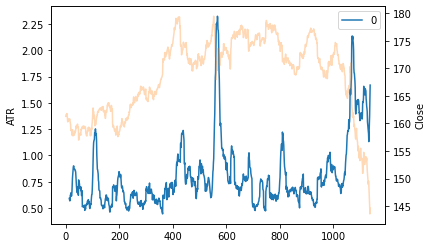

In [24]:
fig, ax = plt.subplots()
ATR.plot(ax=ax)
ax2 = df['Close'].plot(ax=ax, secondary_y=True, alpha=.3)
ax.set_ylabel("ATR")
ax2.set_ylabel("Close")


In [25]:
df.head()

,Date,Open,High,Low,Close,Vol,Change %
0,2018-01-02,161.78,161.78,161.18,161.28,485600.0,-0.25%
1,2018-01-03,161.26,161.82,161.20,161.58,604240.0,0.19%
2,2018-01-04,161.44,161.75,161.26,161.59,640610.0,0.01%
3,2018-01-05,161.70,161.87,161.50,161.59,467090.0,0.00%
4,2018-01-08,161.64,162.04,161.39,161.80,454690.0,0.13%


Formula :

 $ STD DEV = $$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

In [26]:
df['Change %']

0       -0.25%
1        0.19%
2        0.01%
3        0.00%
4        0.13%
         ...  
1134    -0.77%
1135    -0.55%
1136    -1.22%
1137    -1.10%
1138     0.71%
Name: Change %, Length: 1139, dtype: object

In [27]:
df['Change %'] = df['Change %'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)/100

In [28]:
df['Change %']

0      -0.0025
1       0.0019
2       0.0001
3       0.0000
4       0.0013
         ...  
1134   -0.0077
1135   -0.0055
1136   -0.0122
1137   -0.0110
1138    0.0071
Name: Change %, Length: 1139, dtype: float64

In [29]:
df.head()

,Date,Open,High,Low,Close,Vol,Change %
0,2018-01-02,161.78,161.78,161.18,161.28,485600.0,-0.0025
1,2018-01-03,161.26,161.82,161.20,161.58,604240.0,0.0019
2,2018-01-04,161.44,161.75,161.26,161.59,640610.0,0.0001
3,2018-01-05,161.70,161.87,161.50,161.59,467090.0,0.0000
4,2018-01-08,161.64,162.04,161.39,161.80,454690.0,0.0013


In [30]:
#daily volatility
volatility = df['Change %'].std()*252**.5
volatility
str_vol = str(round(volatility,4)*100) # as we can't concat float to str, needs be converted into str

Text(0.5, 1.0, 'Volatility 5.71')

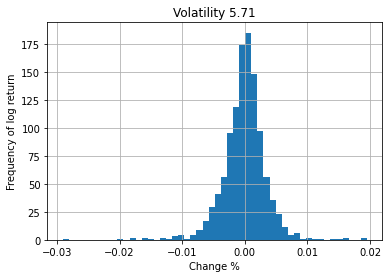

In [31]:
fig,ax = plt.subplots()
df["Change %"].hist(ax=ax, bins=50)
ax.set_xlabel("Change %")
ax.set_ylabel("Frequency of log return")
ax.set_title("Volatility "+ str_vol) 

In [32]:
N = int(input("Enter the Nth term value Moving Standard Deviation for Close"))
df["M_std_dev_close"] = df["Close"].rolling(N).std()  #Moving Standard Deviation for Close
df["M_std_dev_close"].tail() #This shows the last N'th term

Enter the Nth term value Moving Standard Deviation for Close 3


1134    0.879451
1135    0.984344
1136    1.340199
1137    1.696084
1138    0.805543
Name: M_std_dev_close, dtype: float64

In [33]:
N = int(input("Enter the Nth term value Moving Standard Deviation for ATR"))
df["M_std_Dev_ATR"] = ATR.rolling(N).std() #Moving Standard Deviation for ATR
df["M_std_Dev_ATR"].tail() # This shows the last N'th term

Enter the Nth term value Moving Standard Deviation for ATR 4


1134    0.040977
1135    0.050001
1136    0.104303
1137    0.152647
1138    0.183467
Name: M_std_Dev_ATR, dtype: float64

In [34]:
df.tail()

,Date,Open,High,Low,Close,Vol,Change %,M_std_dev_close,M_std_Dev_ATR
1134,2022-06-09,148.69,149.43,147.32,147.80,1040000.0,-0.0077,0.879451,0.040977
1135,2022-06-10,147.74,148.51,146.61,146.98,956290.0,-0.0055,0.984344,0.050001
1136,2022-06-13,146.71,147.19,144.19,145.18,1100000.0,-0.0122,1.340199,0.104303
1137,2022-06-14,144.65,145.58,142.29,143.59,1260000.0,-0.0110,1.696084,0.152647
1138,2022-06-15,142.73,145.51,142.25,144.61,1290000.0,0.0071,0.805543,0.183467


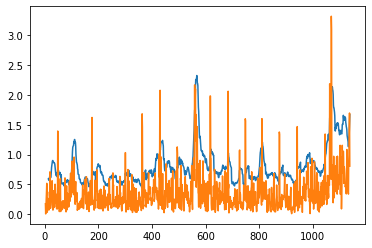

In [53]:
#Graph shows ATR and Moving std dev
fig, ax = plt.subplots()
plt.plot(ATR)
plt.plot(df["M_std_dev_close"], alpha=1)
plt.show()